In [69]:
import numpy as np
from scipy.io.wavfile import read
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.axes as matax
import sys

In [3]:
#samplingFrequency
sampFreq, sound = read('wav1.wav');
print(sampFreq, len(sound), min(sound), max(sound));    

65501 78601546 -1275 1254


In [4]:
#seconds 
initTime = 15;
duration = 5;

In [5]:
start = sampFreq * initTime;
end = start + sampFreq * duration;
s1 = sound[start:end];
print(len(s1))

327505


In [6]:
timeArray = np.arange(0, end-start, 1)
timeArray = timeArray / sampFreq
#timeArray = timeArray

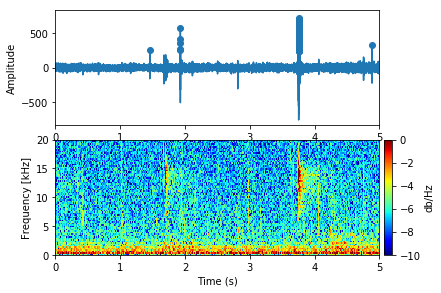

In [112]:
fig = plt.figure()
#fig, axes = plt.subplots(nrows=2, ncols=1)
ax1 = fig.add_axes( [0.12, 0.55, 0.75, 0.4] )
ax2 = fig.add_axes( [0.12, 0.1, 0.75, 0.4] )
ax3 = fig.add_axes( [0.88, 0.1, 0.02, 0.4] )
    
#--- Figure 1. ---#
ax1.plot(timeArray, s1)
ax1.set_ylabel('Amplitude')
ax1.set_xlim(0, duration)
ax1.margins(x=0)
#--- Figure 2. ---#
f, t, Sxx = signal.spectrogram(s1, sampFreq, nperseg=256)
im = ax2.pcolormesh(t, f/1000, np.log(Sxx), cmap='jet' )

tendev = np.std(s1) * 10
a = s1 > tendev
#for values in s2:
#    if(values < tendev)
#        values = 0
#print(tendev)
ax1.scatter(timeArray[a],s1[a])

ax2.set_ylabel('Frequency [kHz]')
ax2.set_ylim(0,20)
ax2.set_xlim(0, duration);
ax2.set_xlabel('Time (s)')
ax2.margins(x=0)
im.set_clim(-10, 0)

mappable = im
cb = plt.colorbar(mappable = mappable, cax = ax3)
cb.set_label('db/Hz')

plt.show();

In [107]:
Sxx_db = 20*np.log10(Sxx)

In [9]:
tendev = np.std(s1) * 10
a = s1 > tendev
#for values in s2:
#    if(values < tendev)
#        values = 0
print(tendev)


242.529107793


In [47]:
timeArray[a]
snaps = [];
snapIndex = [];

current = timeArray[a][0]
snaps.append(current)
snapIndex.append(current * sampFreq)

for time in timeArray[a]: 
    
    if (time > current + 0.01 ):
        snapIndex.append(time * sampFreq)
        snaps.append(time)
        current = time
        

    



In [27]:
snapIndex

[95340.0, 126268.0, 245698.0, 320041.0]

In [64]:
#experiment
print(int(snapIndex[0]))
front= (int(snapIndex[0])-50)
back=  (int(snapIndex[0])+200)
first = s1[front:back];
print(first)

95340
[ -11    2    4   -4   -8   -3  -13  -13  -11   -3   -5   -3   -6   -7   -8
   -2    4   -2   -8    1   -3   -2    2    4  -10   -6    5    2    3    6
    3    7   12   18   15    6   17   24    2    2   14   39   46   30  -20
  -95 -151 -159  -39  195  250   37  -47   33   14   33  103    3  -72  -16
  -27  -61   -1   17  -14    2   70   43  -17  -11   24   14   16   34   33
  -10  -22    6   -9   -1    0  -19   -3    1    0   -7   19   22   -1  -12
   -3  -19  -14   -8   -4   -2  -19  -20   -5  -10   -8   12    3   -2   -1
  -11   -2   21   58   81   32  -58 -122  -53    0  -35  -14   43  -15  -60
    7   58   36   19   40   12    2   37  -22  -51    2    6  -26   -5   18
  -19  -44  -11   19   12   22   18    1    4    4    2   -2   -9   -6   -1
   17    3   -8    7    9    2   -1   13   21   18    2   11    2   -5   10
    8    7   22   29   24    9   20   12   12   26   15    8   13   19    6
    5    1    3   -4   -7   -5    1    2    4   -1   -1   12    1    2   -8
   11 

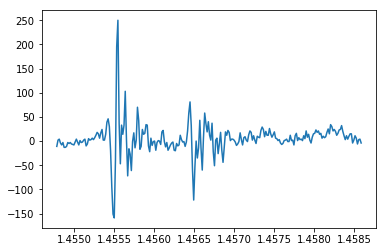

array([ -11,    2,    4,   -4,   -8,   -3,  -13,  -13,  -11,   -3,   -5,
         -3,   -6,   -7,   -8,   -2,    4,   -2,   -8,    1,   -3,   -2,
          2,    4,  -10,   -6,    5,    2,    3,    6,    3,    7,   12,
         18,   15,    6,   17,   24,    2,    2,   14,   39,   46,   30,
        -20,  -95, -151, -159,  -39,  195,  250,   37,  -47,   33,   14,
         33,  103,    3,  -72,  -16,  -27,  -61,   -1,   17,  -14,    2,
         70,   43,  -17,  -11,   24,   14,   16,   34,   33,  -10,  -22,
          6,   -9,   -1,    0,  -19,   -3,    1,    0,   -7,   19,   22,
         -1,  -12,   -3,  -19,  -14,   -8,   -4,   -2,  -19,  -20,   -5,
        -10,   -8,   12,    3,   -2,   -1,  -11,   -2,   21,   58,   81,
         32,  -58, -122,  -53,    0,  -35,  -14,   43,  -15,  -60,    7,
         58,   36,   19,   40,   12,    2,   37,  -22,  -51,    2,    6,
        -26,   -5,   18,  -19,  -44,  -11,   19,   12,   22,   18,    1,
          4,    4,    2,   -2,   -9,   -6,   -1,   

In [65]:
time = timeArray[front:back];
plt.plot(time, first);
plt.show();
first

In [120]:
fft = np.fft.fft(first, n=None, axis=-1, norm=None)
print(fft.size)
print(first.size)
#print(max(fft))
#print(np.std(np.log(fft)))
f1, t1, sxx2 = signal.spectrogram(first, sampFreq, nperseg=1)

250
250


[ 0.]


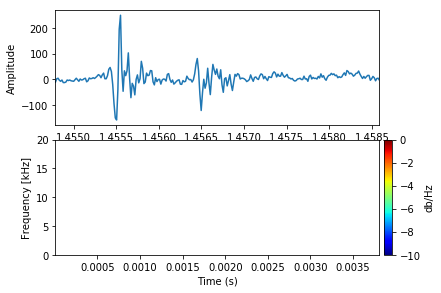

In [125]:
print(f1)
fig = plt.figure()
#fig, axes = plt.subplots(nrows=2, ncols=1)
ax1 = fig.add_axes( [0.12, 0.55, 0.75, 0.4] )
ax2 = fig.add_axes( [0.12, 0.1, 0.75, 0.4] )
ax3 = fig.add_axes( [0.88, 0.1, 0.02, 0.4] )
    
#--- Figure 1. ---#
ax1.plot(time, first)
ax1.set_ylabel('Amplitude')
#ax1.set_xlim(0, duration)
ax1.margins(x=0)
#--- Figure 2. ---#
#f, t, Sxx = signal.spectrogram(first, sampFreq, nperseg=250)
im = ax2.pcolormesh(t1, f1/1000, sxx2, cmap='jet' )

#ax1.scatter(timeArray[a],s1[a])

ax2.set_ylabel('Frequency [kHz]')
ax2.set_ylim(0,20)
ax2.set_xlabel('Time (s)')
ax2.margins(x=0)
im.set_clim(-10, 0)

mappable = im
cb = plt.colorbar(mappable = mappable, cax = ax3)
cb.set_label('db/Hz')
plt.show();

In [53]:
def avgfreq(f, start, end):
    freq = f[start:end];
    print(freq);        

In [15]:
def startOfPing(f):
    print(max(f))

In [16]:
print(len(f), len(t), len(Sxx))
#diff of f is nperseg.

129 1461 129


In [17]:
max(f)

32750.499999999996

In [18]:
128 * 256

32768

In [19]:
f

array([     0.        ,    255.86328125,    511.7265625 ,    767.58984375,
         1023.453125  ,   1279.31640625,   1535.1796875 ,   1791.04296875,
         2046.90625   ,   2302.76953125,   2558.6328125 ,   2814.49609375,
         3070.359375  ,   3326.22265625,   3582.0859375 ,   3837.94921875,
         4093.8125    ,   4349.67578125,   4605.5390625 ,   4861.40234375,
         5117.265625  ,   5373.12890625,   5628.9921875 ,   5884.85546875,
         6140.71875   ,   6396.58203125,   6652.4453125 ,   6908.30859375,
         7164.171875  ,   7420.03515625,   7675.8984375 ,   7931.76171875,
         8187.625     ,   8443.48828125,   8699.3515625 ,   8955.21484375,
         9211.078125  ,   9466.94140625,   9722.8046875 ,   9978.66796875,
        10234.53125   ,  10490.39453125,  10746.2578125 ,  11002.12109375,
        11257.984375  ,  11513.84765625,  11769.7109375 ,  12025.57421875,
        12281.4375    ,  12537.30078125,  12793.1640625 ,  13049.02734375,
        13304.890625  ,  

In [20]:
len(f)

129